# Câu 1
## Bài toán phân loại và hồi quy sử dụng các phương pháp học máy

### Mục tiêu
Sử dụng các phương pháp học máy đã học (và có thể mở rộng thêm các phương pháp khác) để giải bài toán theo cả hai hướng: phân loại (classification) và hồi quy (regression). Thực hiện quy trình gồm các bước dưới đây để xử lý và đánh giá bài toán.

---

### Các bước thực hiện

#### 1. Thống kê đặc điểm của dữ liệu bằng Data Visualization
   - Khám phá đặc điểm tổng quát của dữ liệu, bao gồm phân phối của các biến, sự tương quan giữa các đặc trưng, và xác định các mẫu dữ liệu bất thường (outliers).
   - Sử dụng các biểu đồ như histogram, boxplot, scatter plot, heatmap,... để thể hiện trực quan các đặc điểm này.

#### 2. Tiền xử lý dữ liệu
   - **Type Conversion**: Chuyển đổi kiểu dữ liệu nếu cần thiết (ví dụ: từ dạng chuỗi sang số hoặc nhãn phân loại).
   - **Data Normalization**: Chuẩn hóa dữ liệu để đưa các giá trị về cùng thang đo, tăng hiệu quả của các thuật toán học máy.

#### 3. Phân chia dữ liệu thành tập train và tập evaluation
   - Chia dữ liệu thành hai tập: **Train** và **Evaluation** theo tỷ lệ phù hợp (ví dụ 80/20 hoặc 70/30).
   - Đảm bảo rằng cả hai tập này đều có phân phối dữ liệu phù hợp để đảm bảo tính đại diện.

#### 4. Thực hiện phân loại và hồi quy
   - **Phân loại (Classification)**: Áp dụng các phương pháp phân loại khác nhau như SVM, KNN, Random Forest, hoặc các thuật toán khác.
   - **Hồi quy (Regression)**: Thử nghiệm các phương pháp hồi quy như Linear Regression, Decision Tree Regressor, SVR,...

#### 5. Đánh giá kết quả và so sánh các phương pháp
   - Đánh giá hiệu quả của các phương pháp bằng các chỉ số như độ chính xác, F1-score cho phân loại, hoặc MAE, RMSE cho hồi quy.
   - **So sánh các phương pháp**: Sử dụng biểu đồ để hiển thị kết quả của các phương pháp phân loại và hồi quy, cho phép quan sát sự khác biệt giữa các phương pháp một cách trực quan.
   - **Biểu đồ trực quan**: Ví dụ sử dụng bar chart hoặc line chart để thể hiện độ chính xác, lỗi trung bình của các phương pháp.

---

### Kết luận
Tóm tắt các kết quả đạt được từ các phương pháp phân loại và hồi quy, nêu bật phương pháp hiệu quả nhất trong việc giải quyết bài toán.


# Thêm các thư viện

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR

In [3]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import accuracy_score

## Lọc dữ liệu

In [4]:
pd.options.display.max_columns = None

In [5]:
rental = pd.read_csv('apartments_for_rent_classified_10K.csv', sep=';', encoding='latin1')

rental.head()


id                category  \
0  5668626895  housing/rent/apartment   
1  5664597177  housing/rent/apartment   
2  5668626833  housing/rent/apartment   
3  5659918074  housing/rent/apartment   
4  5668626759  housing/rent/apartment   

                                               title  \
0  Studio apartment 2nd St NE, Uhland Terrace NE,...   
1                  Studio apartment 814 Schutte Road   
2  Studio apartment N Scott St, 14th St N, Arling...   
3                     Studio apartment 1717 12th Ave   
4  Studio apartment Washington Blvd, N Cleveland ...   

                                                body amenities  bathrooms  \
0  This unit is located at second St NE, Uhland T...       NaN        NaN   
1  This unit is located at 814 Schutte Road, Evan...       NaN        NaN   
2  This unit is located at N Scott St, 14th St N,...       NaN        1.0   
3  This unit is located at 1717 12th Ave, Seattle...       NaN        1.0   
4  This unit is located at Washington Blvd, N Cle...       NaN        NaN   

   bedrooms currency fee  has_photo pets_allowed  price price_display  \
0       0.0      USD  No  Thumbnail          NaN    790          $790   
1       1.0      USD  No  Thumbnail          NaN    425          $425   
2       0.0      USD  No  Thumbnail          NaN   1390        $1,390   
3       0.0      USD  No  Thumbnail          NaN    925          $925   
4       0.0      USD  No  Thumbnail          NaN    880          $880   

  price_type  square_feet           address    cityname state  latitude  \
0    Monthly          101               NaN  Washington    DC   38.9057   
1    Monthly          106    814 Schutte Rd  Evansville    IN   37.9680   
2    Monthly          107               NaN   Arlington    VA   38.8910   
3    Monthly          116  1717 12th Avenue     Seattle    WA   47.6160   
4    Monthly          125               NaN   Arlington    VA   38.8738   

   longitude     source        time  
0   -76.9861  RentLingo  1577359415  
1   -87.6621  RentLingo  1577017063  
2   -77.0816  RentLingo  1577359410  
3  -122.3275  RentLingo  1576667743  
4   -77.1055  RentLingo  1577359401

In [6]:
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   category       10000 non-null  object 
 2   title          10000 non-null  object 
 3   body           10000 non-null  object 
 4   amenities      6451 non-null   object 
 5   bathrooms      9966 non-null   float64
 6   bedrooms       9993 non-null   float64
 7   currency       10000 non-null  object 
 8   fee            10000 non-null  object 
 9   has_photo      10000 non-null  object 
 10  pets_allowed   5837 non-null   object 
 11  price          10000 non-null  int64  
 12  price_display  10000 non-null  object 
 13  price_type     10000 non-null  object 
 14  square_feet    10000 non-null  int64  
 15  address        6673 non-null   object 
 16  cityname       9923 non-null   object 
 17  state          9923 non-null   object 
 18  latitud

In [7]:
rental = rental.drop(columns=['id', 'title', 'body', 'price_display', 'address', 'pets_allowed', 'currency'])

In [8]:
rental.isnull().sum()

category          0
amenities      3549
bathrooms        34
bedrooms          7
fee               0
has_photo         0
price             0
price_type        0
square_feet       0
cityname         77
state            77
latitude         10
longitude        10
source            0
time              0
dtype: int64

In [9]:
#drop missing value
rental = rental.dropna()
rental = rental.reset_index(drop=True)

In [10]:
# check for missing values again
rental.isnull().sum()

category       0
amenities      0
bathrooms      0
bedrooms       0
fee            0
has_photo      0
price          0
price_type     0
square_feet    0
cityname       0
state          0
latitude       0
longitude      0
source         0
time           0
dtype: int64

In [11]:
print("There are {} duplicate values.".format(rental.duplicated().sum()))
rental[rental.duplicated(keep=False)].head(10)

There are 4 duplicate values.


category  \
722   housing/rent/apartment   
723   housing/rent/apartment   
5216  housing/rent/apartment   
5217  housing/rent/apartment   
6008  housing/rent/apartment   
6009  housing/rent/apartment   
6010  housing/rent/apartment   

                                              amenities  bathrooms  bedrooms  \
722   Cable or Satellite,Dishwasher,Elevator,Garbage...        1.0       1.0   
723   Cable or Satellite,Dishwasher,Elevator,Garbage...        1.0       1.0   
5216            Dishwasher,Parking,Refrigerator,Storage        2.0       3.0   
5217            Dishwasher,Parking,Refrigerator,Storage        2.0       3.0   
6008                            Dishwasher,Refrigerator        2.0       3.0   
6009                            Dishwasher,Refrigerator        2.0       3.0   
6010                            Dishwasher,Refrigerator        2.0       3.0   

     fee  has_photo  price price_type  square_feet       cityname state  \
722   No  Thumbnail   1125    Monthly          529         Austin    TX   
723   No  Thumbnail   1125    Monthly          529         Austin    TX   
5216  No  Thumbnail   2295    Monthly         1126        Madison    WI   
5217  No  Thumbnail   2295    Monthly         1126        Madison    WI   
6008  No  Thumbnail   1449    Monthly         1474  New Braunfels    TX   
6009  No  Thumbnail   1449    Monthly         1474  New Braunfels    TX   
6010  No  Thumbnail   1449    Monthly         1474  New Braunfels    TX   

      latitude  longitude     source        time  
722    30.3054   -97.7497  RentLingo  1577014860  
723    30.3054   -97.7497  RentLingo  1577014860  
5216   43.0724   -89.4003  RentLingo  1577015758  
5217   43.0724   -89.4003  RentLingo  1577015758  
6008   29.7398   -98.1021  RentLingo  1577358375  
6009   29.7398   -98.1021  RentLingo  1577358375  
6010   29.7398   -98.1021  RentLingo  1577358375

In [12]:
rental = rental.drop_duplicates()
rental = rental.reset_index(drop=True)

In [13]:
print("There are {} duplicate values.".format(rental.duplicated().sum()))
rental.head()

There are 0 duplicate values.


category                                          amenities  \
0  housing/rent/apartment        Dishwasher,Elevator,Patio/Deck,Pool,Storage   
1  housing/rent/apartment                                       Refrigerator   
2  housing/rent/apartment                                       Refrigerator   
3  housing/rent/apartment  AC,Basketball,Cable or Satellite,Gym,Internet ...   
4  housing/rent/apartment  AC,Basketball,Cable or Satellite,Gym,Internet ...   

   bathrooms  bedrooms fee  has_photo  price price_type  square_feet  \
0        1.0       0.0  No  Thumbnail   2475    Monthly          130   
1        1.0       0.0  No  Thumbnail   1495    Monthly          138   
2        1.0       0.0  No  Thumbnail   1695    Monthly          190   
3        1.0       1.0  No  Thumbnail   1560     Weekly          200   
4        1.0       1.0  No  Thumbnail   1560    Monthly          200   

        cityname state  latitude  longitude        source        time  
0      Manhattan    NY   40.7629   -73.9885      Listanza  1577289784  
1  San Francisco    CA   37.7599  -122.4379     RentLingo  1577358313  
2  San Francisco    CA   37.7599  -122.4379     RentLingo  1577015121  
3       New Bern    NC   35.0847   -77.0609     ListedBuy  1576618076  
4       New Bern    NC   35.0960   -77.0272  RentDigs.com  1576406273

In [14]:
# #drop value = 0
# rental = rental[rental["square_feet"] != 0].reset_index(drop=True)

# rental = rental[rental["bedrooms"] != 0].reset_index(drop=True)

# rental = rental[rental["bathrooms"] != 0].reset_index(drop=True)


# rental.head(10)

In [15]:
rental['category'].value_counts()

category
housing/rent/apartment     6410
housing/rent/home             2
housing/rent/short_term       1
Name: count, dtype: int64

In [16]:
rental['amenities'].value_counts()

amenities
Parking                                                                                                                                 229
Dishwasher,Refrigerator                                                                                                                 222
Pool                                                                                                                                    167
Dishwasher,Parking,Pool                                                                                                                 149
Dishwasher                                                                                                                              147
                                                                                                                                       ... 
Cable or Satellite,Dishwasher,Internet Access,Parking                                                                                     1
Cable or S

In [17]:
rental['price_type'].value_counts()

price_type
Monthly    6412
Weekly        1
Name: count, dtype: int64

In [18]:
rental['source'].value_counts()

source
RentLingo            3631
RentDigs.com         2541
ListedBuy             161
GoSection8             30
Listanza               18
RENTOCULAR             15
RealRentals            11
rentbits                2
Home Rentals            1
Real Estate Agent       1
RENTCafé                1
tenantcloud             1
Name: count, dtype: int64

In [19]:
rental['fee'].value_counts()

fee
No    6413
Name: count, dtype: int64

In [20]:

# rental = rental[rental["price_type"] != "Weekly"].reset_index(drop=True)


In [21]:
rental['square_feet'].value_counts()

square_feet
700     119
800      97
600      96
900      90
750      87
       ... 
1292      1
1288      1
1285      1
1284      1
5700      1
Name: count, Length: 1325, dtype: int64

In [22]:
rental['cityname'].value_counts()

cityname
Austin         331
Houston        157
Dallas         151
San Antonio    123
Madison        111
              ... 
Lumberton        1
Coppell          1
Worcester        1
Chandler         1
Maricopa         1
Name: count, Length: 1131, dtype: int64

In [23]:
rental['state'].value_counts()

state
TX    1214
CA     441
MD     348
WA     333
NC     326
NJ     319
GA     287
WI     270
OH     246
FL     223
CO     204
IN     192
MO     174
IL     167
MN     146
MA     144
VA     137
PA     116
OK     106
MI      96
NV      91
AZ      89
IA      82
CT      81
NH      59
OR      54
TN      46
SC      41
KS      40
NY      39
NE      38
AK      34
SD      33
DC      29
UT      29
AR      28
KY      25
LA      24
AL      15
VT      11
RI       9
ND       9
ID       4
MT       3
MS       3
NM       2
DE       2
ME       1
WV       1
WY       1
HI       1
Name: count, dtype: int64

Check For Outlier

In [24]:
print(rental["price"].describe())

count     6413.000000
mean      1408.356308
std       1030.292440
min        224.000000
25%        930.000000
50%       1225.000000
75%       1599.000000
max      52500.000000
Name: price, dtype: float64


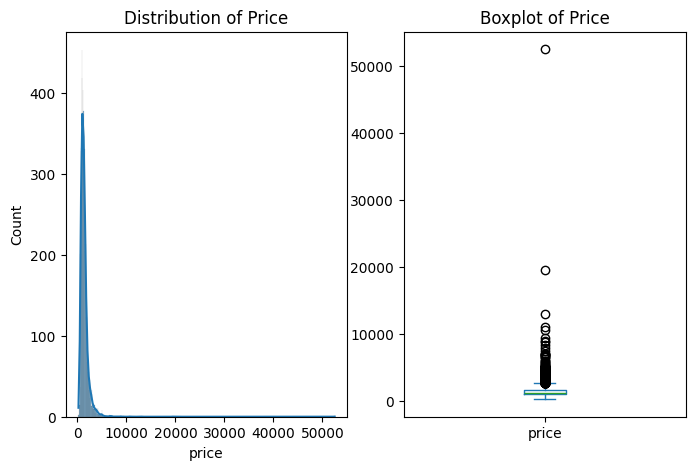

In [25]:
plt.figure(figsize=(16, 5))

# Biểu đồ phân phối (distribution plot) cho cột price
plt.subplot(121)
sns.histplot(rental["price"], kde=True)
plt.title("Distribution of Price")

# Boxplot cho cột price
plt.subplot(122)
rental["price"].plot.box(figsize=(8, 5))
plt.title("Boxplot of Price")

plt.show()


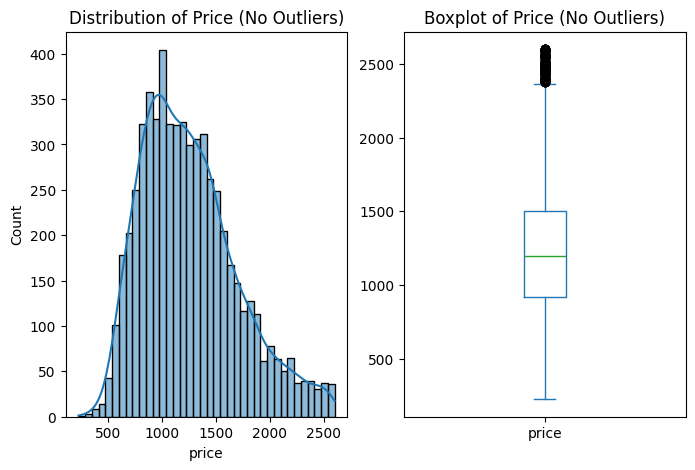

In [26]:
import numpy as np

# Tính Q1, Q3 và IQR cho cột price
Q1 = rental["price"].quantile(0.25)
Q3 = rental["price"].quantile(0.75)
IQR = Q3 - Q1

# Xác định giới hạn dưới và trên để xác định ngoại lệ
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Lọc các giá trị không nằm trong khoảng ngoại lệ
rental = rental[(rental["price"] >= lower_bound) & (rental["price"] <= upper_bound)]

# Kiểm tra lại phân phối sau khi loại bỏ ngoại lệ
plt.figure(figsize=(16, 5))

# Biểu đồ phân phối mới
plt.subplot(121)
sns.histplot(rental["price"], kde=True)
plt.title("Distribution of Price (No Outliers)")

# Boxplot mới
plt.subplot(122)
rental["price"].plot.box(figsize=(8, 5))
plt.title("Boxplot of Price (No Outliers)")

plt.show()


In [27]:
print(rental["price"].describe())

count    6022.000000
mean     1254.085188
std       444.954769
min       224.000000
25%       917.000000
50%      1195.000000
75%      1500.000000
max      2600.000000
Name: price, dtype: float64


Text(0, 0.5, 'Price')

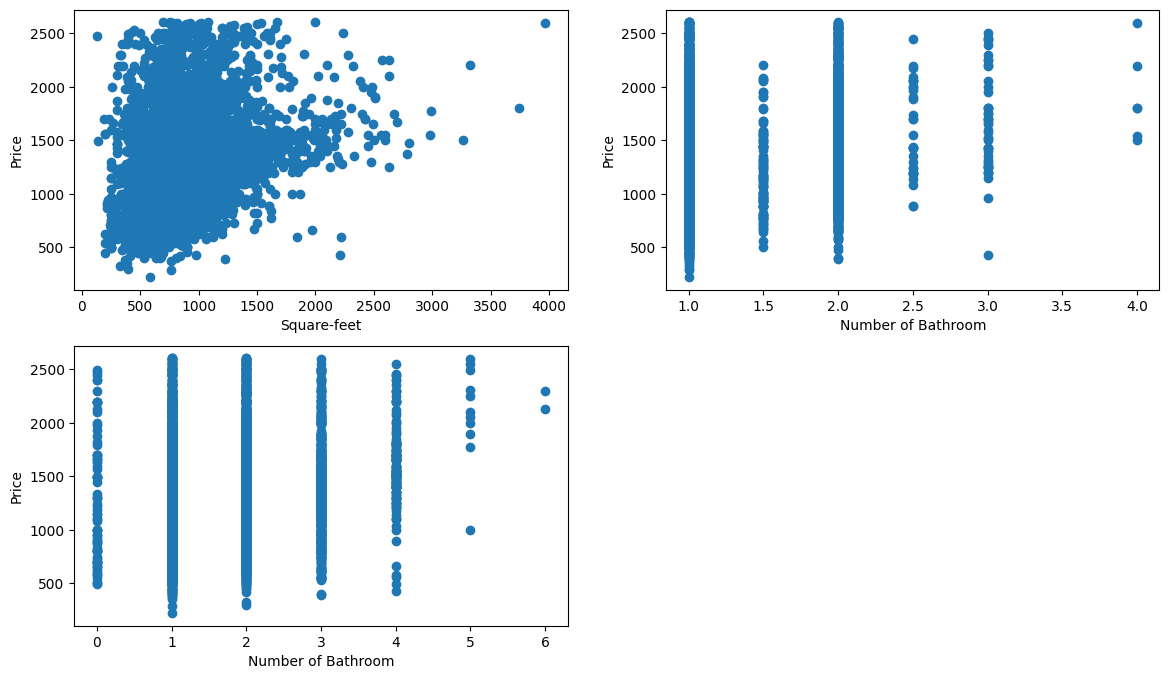

In [28]:
plt.figure(figsize=(14,8))

plt.subplot(2,2,1)
plt.scatter(x=rental["square_feet"], y=rental["price"])
plt.xlabel("Square-feet")
plt.ylabel("Price")

plt.subplot(2,2,2)
plt.scatter(x=rental["bathrooms"], y=rental["price"])
plt.xlabel("Number of Bathroom")
plt.ylabel("Price")

plt.subplot(2,2,3)
plt.scatter(x=rental["bedrooms"], y=rental["price"])
plt.xlabel("Number of Bathroom")
plt.ylabel("Price")

In [29]:
# calculate correlation matrix
corr = rental[["bathrooms", "bedrooms","square_feet","price"]].corr()
corr

bathrooms  bedrooms  square_feet     price
bathrooms     1.000000  0.633654     0.715447  0.307980
bedrooms      0.633654  1.000000     0.694102  0.236019
square_feet   0.715447  0.694102     1.000000  0.334494
price         0.307980  0.236019     0.334494  1.000000

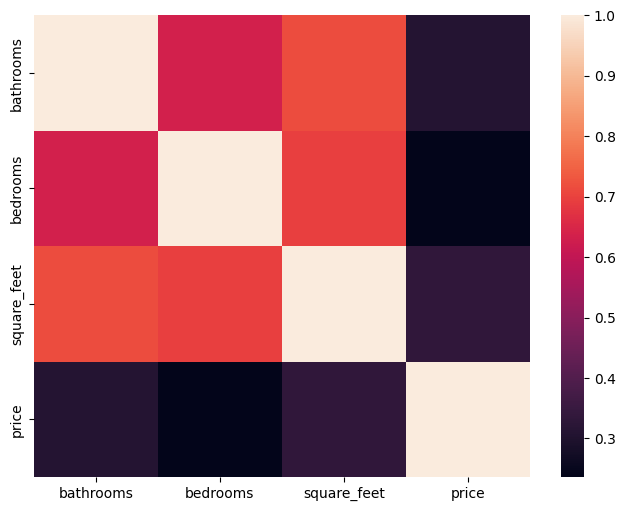

In [30]:
# visualize correlation matrix
plt.subplots(figsize=(8,6))

fig = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


-----
## Bước 2: Tiền xử lý dữ liệu


Type Conversion

In [31]:
rental_df = pd.get_dummies(rental)
rental_df.head()

bathrooms  bedrooms  price  square_feet  latitude  longitude        time  \
0        1.0       0.0   2475          130   40.7629   -73.9885  1577289784   
1        1.0       0.0   1495          138   37.7599  -122.4379  1577358313   
2        1.0       0.0   1695          190   37.7599  -122.4379  1577015121   
3        1.0       1.0   1560          200   35.0847   -77.0609  1576618076   
4        1.0       1.0   1560          200   35.0960   -77.0272  1576406273   

   category_housing/rent/apartment  category_housing/rent/home  \
0                             True                       False   
1                             True                       False   
2                             True                       False   
3                             True                       False   
4                             True                       False   

   category_housing/rent/short_term  amenities_AC  \
0                             False         False   
1                             False         False   
2                             False         False   
3                             False         False   
4                             False         False   

   amenities_AC,Alarm,Cable or Satellite,Clubhouse,Dishwasher,Fireplace,Garbage Disposal,Internet Access,Parking,Patio/Deck,Playground,Refrigerator,Washer Dryer  \
0                                              False                                                                                                               
1                                              False                                                                                                               
2                                              False                                                                                                               
3                                              False                                                                                                               
4                                              False                                                                                                               

   amenities_AC,Alarm,Cable or Satellite,Clubhouse,Dishwasher,Fireplace,Gym,Internet Access,Patio/Deck,Refrigerator,Storage,Tennis,Washer Dryer  \
0                                              False                                                                                              
1                                              False                                                                                              
2                                              False                                                                                              
3                                              False                                                                                              
4                                              False                                                                                              

   amenities_AC,Alarm,Cable or Satellite,Dishwasher,Fireplace,Gated,Gym,Parking,Patio/Deck,Playground,Pool,Refrigerator,Washer Dryer  \
0                                              False                                                                                   
1                                              False                                                                                   
2                                              False                                                                                   
3                                              False                                                                                   
4                                              False                                                                                   

   amenities_AC,Alarm,Cable or Satellite,Dishwasher,Internet Access,Patio/Deck,Washer Dryer  \
0                               

Data Normalization

In [32]:
# Khởi tạo MinMaxScaler với phạm vi chuẩn hóa (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))

# Danh sách các cột cần chuẩn hóa
numerical_cols = ['bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude', 'time']

# Chọn các cột cần chuẩn hóa và thực hiện fit_transform
rental_df[numerical_cols] = scaler.fit_transform(rental_df[numerical_cols])

# Kiểm tra kết quả
print(rental_df[numerical_cols].head())



# from sklearn.preprocessing import StandardScaler

# # Khởi tạo StandardScaler
# scaler = StandardScaler()

# # Danh sách các cột cần chuẩn hóa
# numerical_cols = ['bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude', 'time']

# # Chọn các cột cần chuẩn hóa và thực hiện fit_transform
# rental_df[numerical_cols] = scaler.fit_transform(rental_df[numerical_cols])

# # Kiểm tra kết quả
# print(rental_df[numerical_cols].head())



   bathrooms  bedrooms  square_feet  latitude  longitude      time
0        0.0  0.000000     0.000000  0.424776   0.952383  0.991604
1        0.0  0.000000     0.002086  0.341852   0.344779  0.999556
2        0.0  0.000000     0.015641  0.341852   0.344779  0.959734
3        0.0  0.166667     0.018248  0.267980   0.913852  0.913663
4        0.0  0.166667     0.018248  0.268292   0.914275  0.889087


-----
## Bước 3: Phân chia dữ liệu thành tập train và evaluation

In [33]:
X = rental_df.drop(columns=['price'])
y_reg = rental_df['price']

median = np.median(y_reg)
y_class = (rental_df['price']>median).astype(int)

# Chia dữ liệu thành các tập huấn luyện và kiểm tra
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=0)
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=0)


--------


## Bước 4: Xây dựng mô hình

### Hồi quy

In [34]:
linear_reg = LinearRegression()
rf_reg = RandomForestRegressor(random_state=0)
dt_reg = DecisionTreeRegressor()
gbs_reg = GradientBoostingRegressor()
svm_reg = SVR(kernel='rbf')

In [35]:
linear_reg.fit(X_train, y_train_reg)
rf_reg.fit(X_train, y_train_reg)
dt_reg.fit(X_train, y_train_reg)
gbs_reg.fit(X_train, y_train_reg)
svm_reg.fit(X_train, y_train_reg)

SVR()

In [36]:
# make predictions
y_pred_lin_reg = linear_reg.predict(X_test)
y_pred_forest_reg = rf_reg.predict(X_test)
y_pred_tree_reg = dt_reg.predict(X_test)
y_pred_gradient_reg = gbs_reg.predict(X_test)
y_pred_svm_reg = svm_reg.predict(X_test)

In [37]:


lin_r2 = r2_score(y_test_reg, y_pred_lin_reg)
print("Linear Regression R-squared: {}".format(lin_r2))

forest_r2 = r2_score(y_test_reg, y_pred_forest_reg)
print("Random Forest R-squared: {}".format(forest_r2))

decision_r2 = r2_score(y_test_reg, y_pred_tree_reg)
print("Decision Tree R-squared: {}".format(decision_r2))

gradient_r2 = r2_score(y_test_reg, y_pred_gradient_reg)
print("Gradient Boosting R-squared: {}".format(gradient_r2))

svm_r2 = r2_score(y_test_reg, y_pred_svm_reg)
print("SVM Regression R-squared: {}".format(svm_r2))

Linear Regression R-squared: -7.88548020754639e+20
Random Forest R-squared: 0.6975076008375691
Decision Tree R-squared: 0.5251795525060635
Gradient Boosting R-squared: 0.6027560094937439
SVM Regression R-squared: 0.050420103372290415


In [38]:
# calculate root mean squared error (RMSE)


lin_mse = mean_squared_error(y_pred_lin_reg, y_test_reg)
lin_rmse = np.sqrt(lin_mse)
print("Linear Regression RMSE: {}".format(lin_rmse))

forest_mse = mean_squared_error(y_pred_forest_reg, y_test_reg)
forest_rmse = np.sqrt(forest_mse)
print("Random Forest Regression RMSE: {}".format(forest_rmse))


decision_mse = mean_squared_error(y_pred_tree_reg, y_test_reg)
decision_rmse = np.sqrt(decision_mse)
print("Decision Tree Regression RMSE: {}".format(decision_rmse))

Linear Regression RMSE: 12385624439612.562
Random Forest Regression RMSE: 242.58339360625445
Decision Tree Regression RMSE: 303.92648024512584


In [39]:
# calculate mean absolute error (MAE)


lin_mae = mean_absolute_error(y_pred_lin_reg, y_test_reg)
print("Liner Regression MAE: {}".format(lin_mae))
forest_mae = mean_absolute_error(y_pred_forest_reg, y_test_reg)
print("Random Forest Regression MAE: {}".format(forest_mae))

decision_mae = mean_absolute_error(y_pred_tree_reg, y_test_reg)
print("Decision Tree Regression MAE: {}".format(decision_mae))

Liner Regression MAE: 2178779474690.8499
Random Forest Regression MAE: 167.1695020746888
Decision Tree Regression MAE: 210.55684647302905


### Phân loại

In [40]:
log_reg = LogisticRegression(max_iter=200)
rf_cls = RandomForestClassifier()
dt_cls = DecisionTreeClassifier()
gbc_cls = GradientBoostingClassifier()
knn_cls = KNeighborsClassifier(n_neighbors=5)

In [41]:
#Huấn luyện
log_reg.fit(X_train, y_train_class)
rf_cls.fit(X_train, y_train_class)
dt_cls.fit(X_train,y_train_class)
gbc_cls.fit(X_train,y_train_class)
knn_cls.fit(X_train,y_train_class)

KNeighborsClassifier()

In [42]:
y_pred_log_reg = log_reg.predict(X_test)
y_pred_rf_cls = rf_cls.predict(X_test)
y_pred_dt_cls = dt_cls.predict(X_test)
y_pred_gbs_cls = gbc_cls.predict(X_test)
y_pred_knn_cls = knn_cls.predict(X_test)

In [43]:
acc_log_reg = accuracy_score(y_test_class, y_pred_log_reg)
acc_pred_rf_cls =accuracy_score(y_test_class, y_pred_rf_cls)
acc_dt_cls = accuracy_score(y_test_class, y_pred_dt_cls)
acc_gbs_cls = accuracy_score(y_test_class, y_pred_gbs_cls)
acc_knn_cls = accuracy_score(y_test_class, y_pred_knn_cls)

In [44]:
print("Accuracy of Logistic Regression:\n",acc_log_reg)
print("Accuracy of Random Forest:\n",acc_pred_rf_cls)
print("Accuracy of Decision Tree:\n",acc_dt_cls )
print("Accuracy of Gradient Boosting:\n",acc_gbs_cls)
print("Accuracy of Gradient Boosting:\n",acc_knn_cls)


Accuracy of Logistic Regression:
 0.8448132780082988
Accuracy of Random Forest:
 0.8556016597510373
Accuracy of Decision Tree:
 0.833195020746888
Accuracy of Gradient Boosting:
 0.8340248962655602
Accuracy of Gradient Boosting:
 0.829045643153527


----
## Bước 5: Đánh giá kết quả

In [45]:
data = {"Model":["Linear Regression","Random Forest","Decision Tree"],
        "R-squared":[lin_r2,forest_r2,decision_r2],
        "RMSE":[lin_rmse, forest_rmse,decision_rmse],
        "MAE":[lin_mae, forest_mae,decision_mae]}
results = pd.DataFrame(data=data)
results

Model     R-squared          RMSE           MAE
0  Linear Regression -7.885480e+20  1.238562e+13  2.178779e+12
1      Random Forest  6.975076e-01  2.425834e+02  1.671695e+02
2      Decision Tree  5.251796e-01  3.039265e+02  2.105568e+02

In [46]:
data1 = {"Model":["Logistic Regression","Random Forest","Decision Tree"],
        "Accuracy":[acc_log_reg, acc_pred_rf_cls,acc_dt_cls,] }
result1 = pd.DataFrame(data=data1)
result1


Model  Accuracy
0  Logistic Regression  0.844813
1        Random Forest  0.855602
2        Decision Tree  0.833195

In [47]:
# # Thiết lập kích thước của biểu đồ
# plt.figure(figsize=(8, 6))

# # Vẽ biểu đồ cột cho cột "Model" và "Accuracy" trong result1
# sns.barplot(x="Model", y="Accuracy", data=result1, hue="Model", palette="Reds")

# # Thêm tiêu đề và nhãn cho trục y
# plt.title("Comparison of Model Accuracies", fontsize=16)
# plt.ylabel("Accuracy", fontsize=14)
# plt.xlabel("Model", fontsize=14)

# # Thêm giá trị ở trên các cột
# for p in plt.gca().patches:
#     height = p.get_height()
#     plt.gca().text(p.get_x() + p.get_width() / 2., height + 0.01, f'{height:.2f}', ha='center', fontsize=12)

# # Hiển thị biểu đồ
# plt.ylim(0, 1)  
# plt.show()

In [48]:
# plt.figure(figsize=(12, 14))

# # Biểu đồ cho R-squared
# plt.subplot(3, 1, 1)
# plt.title("Model Comparison in terms of R-squared, RMSE and MAE", fontsize=16)
# sns.barplot(x="Model", y="R-squared", data=results, hue="Model", palette="Blues")
# plt.ylim(0, 1)  # Đặt giới hạn cho trục y để R-squared dễ so sánh
# plt.xlabel("")
# plt.ylabel("R-squared", fontsize=14)

# # Thêm giá trị lên trên các cột của R-squared
# for p in plt.gca().patches:
#     height = p.get_height()
#     plt.gca().text(p.get_x() + p.get_width() / 2., height + 0.01, f'{height:.2f}', ha='center', fontsize=12)

# # Biểu đồ cho RMSE
# plt.subplot(3, 1, 2)
# sns.barplot(x="Model", y="RMSE", data=results, hue="Model", palette="Greens")
# plt.ylim(0, max(results["RMSE"]) + 50)  # Điều chỉnh trục y dựa trên giá trị RMSE cao nhất
# plt.xlabel("")
# plt.ylabel("RMSE", fontsize=14)

# # Thêm giá trị lên trên các cột của RMSE
# for p in plt.gca().patches:
#     height = p.get_height()
#     plt.gca().text(p.get_x() + p.get_width() / 2., height + 15, f'{height:.2f}', ha='center', fontsize=12)

# # Biểu đồ cho MAE
# plt.subplot(3, 1, 3)
# sns.barplot(x="Model", y="MAE", data=results, hue="Model",palette="Oranges")
# plt.ylim(0, max(results["MAE"]) + 20)  
# plt.xlabel("Model", fontsize=14)
# plt.ylabel("MAE", fontsize=14)

# # Thêm giá trị lên trên các cột của MAE
# for p in plt.gca().patches:
#     height = p.get_height()
#     plt.gca().text(p.get_x() + p.get_width() / 2., height + 10, f'{height:.2f}', ha='center', fontsize=12)

# # Hiển thị biểu đồ
# plt.tight_layout()
# plt.show()

Câu 3

In [49]:
corr = X_train.corr()
print(corr)

                     bathrooms  bedrooms  square_feet  latitude  longitude  \
bathrooms             1.000000  0.636167     0.715930 -0.061313   0.076756   
bedrooms              0.636167  1.000000     0.695711  0.033551   0.100698   
square_feet           0.715930  0.695711     1.000000 -0.049842   0.127741   
latitude             -0.061313  0.033551    -0.049842  1.000000  -0.130910   
longitude             0.076756  0.100698     0.127741 -0.130910   1.000000   
...                        ...       ...          ...       ...        ...   
source_RealRentals   -0.002691 -0.031664    -0.011012 -0.000988   0.001066   
source_RentDigs.com   0.193869  0.038602     0.134698  0.078386   0.158100   
source_RentLingo     -0.200981 -0.060942    -0.151151 -0.070942  -0.157992   
source_rentbits      -0.008572 -0.011187    -0.006456  0.020724  -0.029997   
source_tenantcloud   -0.008572  0.024678     0.008027  0.009501   0.016082   

                         time  category_housing/rent/apartment 

In [50]:
corr_pairs =[]
for i in range(len(corr.columns)):
    for j in range(i):
        if corr.iloc[i,j] > 0.85:
            corr_pairs.append((corr.columns[i],corr.columns[j],corr.iloc[i,j]))
corr_pairs

[('price_type_Weekly',
  'amenities_AC,Basketball,Cable or Satellite,Gym,Internet Access,Patio/Deck,Pool,Refrigerator',
  1.0),
 ('cityname_Absecon', 'amenities_AC,Parking,Pool,Tennis', 1.0),
 ('cityname_Adelphi', 'amenities_Playground,Storage', 1.0),
 ('cityname_Aledo',
  'amenities_Fireplace,Patio/Deck,Refrigerator,Washer Dryer,Wood Floors',
  1.0),
 ('cityname_Altamonte Springs',
  'amenities_Cable or Satellite,Dishwasher,Fireplace,Garbage Disposal,Internet Access,Parking,Patio/Deck,Pool,Refrigerator,Storage,Tennis',
  1.0),
 ('cityname_Amelia', 'amenities_Parking,Playground,Storage,Washer Dryer', 1.0),
 ('cityname_Anoka',
  'amenities_Basketball,Cable or Satellite,Clubhouse,Dishwasher,Elevator,Garbage Disposal,Internet Access,Parking,Patio/Deck,Pool,Refrigerator',
  1.0),
 ('cityname_Athens',
  'amenities_Basketball,Cable or Satellite,Clubhouse,Dishwasher,Fireplace,Internet Access,Parking,Pool,Refrigerator',
  1.0),
 ('cityname_Atlantic Highlands',
  'amenities_AC,Cable or Satellit

In [51]:
features_to_drop= []
for i, j,k in corr_pairs:
    features_to_drop.append(i)

features_to_drop=list(set(features_to_drop))
features_to_drop

['cityname_Union',
 'cityname_Caldwell',
 'cityname_Vidor',
 'cityname_Tuscaloosa',
 'cityname_Cedar Knolls',
 'cityname_Ellensburg',
 'cityname_Millburn',
 'cityname_Pendleton',
 'cityname_Scotch Plains',
 'cityname_Dublin',
 'cityname_Sioux City',
 'cityname_Brockport',
 'cityname_Broomfield',
 'cityname_Pearland',
 'cityname_Harker Heights',
 'cityname_North Versailles',
 'cityname_Oviedo',
 'cityname_Wausau',
 'cityname_Harrisburg',
 'cityname_Oaklyn',
 'cityname_Boulder City',
 'cityname_Presto',
 'cityname_Maple Grove',
 'cityname_Capitol Heights',
 'cityname_Canby',
 'state_NV',
 'cityname_Brick',
 'cityname_Roselle Park',
 'cityname_Henderson',
 'cityname_Atlantic Highlands',
 'cityname_Carson',
 'cityname_Athens',
 'cityname_Sunland',
 'cityname_Willingboro',
 'cityname_Broken Arrow',
 'cityname_Fairborn',
 'cityname_Pueblo',
 'cityname_Coralville',
 'cityname_Grand Prairie',
 'state_WV',
 'cityname_Streetsboro',
 'cityname_Hopkins',
 'cityname_Gonzales',
 'cityname_Cheney',
 

In [52]:
X_train_selected = X_train.drop(features_to_drop,axis= 1)
X_train_selected.shape

(4817, 3140)

In [53]:
X_test_selected = X_test.drop(features_to_drop,axis=1)

In [54]:
dt_cls_new  = DecisionTreeClassifier()
dt_cls_new.fit(X_train_selected, y_train_class)
y_pred_dt_cls_new= dt_cls_new.predict(X_test_selected)

In [55]:
rf_cls_new= RandomForestClassifier()
rf_cls_new.fit(X_train_selected, y_train_class)
y_pred_rf_cls_new = rf_cls_new.predict(X_test_selected)

In [56]:
gbs_cls_new= GradientBoostingClassifier()
gbs_cls_new.fit(X_train_selected, y_train_class)
y_pred_gbs_cls_new = gbs_cls_new.predict(X_test_selected)

In [57]:
knn_cls_new= KNeighborsClassifier(n_neighbors=5)
knn_cls_new.fit(X_train_selected, y_train_class)
y_pred_knn_cls_new = knn_cls_new.predict(X_test_selected)

In [58]:
acc_knn_cls_new= accuracy_score(y_test_class,y_pred_knn_cls_new)

In [59]:
acc_gbs_cls_new= accuracy_score(y_test_class,y_pred_gbs_cls_new)

In [60]:
acc_rf_cls_new= accuracy_score(y_test_class,y_pred_rf_cls_new)


In [61]:

acc_dt_cls_new = accuracy_score(y_test_class,y_pred_dt_cls_new)


In [62]:
print("Accuracy of Random Forest:",acc_pred_rf_cls)
print("Accuracy of Random Forest after feature selection",acc_rf_cls_new)
print("Accuracy of Decision Tree:",acc_dt_cls )
print("Accuracy of Decision Tree after features selection:",acc_dt_cls_new)
print("Accuracy of Gradient Boosting:",acc_gbs_cls )
print("Accuracy of Gradient Boosting after features selection:",acc_gbs_cls_new)
print("Accuracy of KNN:",acc_knn_cls )
print("Accuracy of KNN after features selection:",acc_knn_cls_new)


Accuracy of Random Forest: 0.8556016597510373
Accuracy of Random Forest after feature selection 0.8531120331950207
Accuracy of Decision Tree: 0.833195020746888
Accuracy of Decision Tree after features selection: 0.8356846473029046
Accuracy of Gradient Boosting: 0.8340248962655602
Accuracy of Gradient Boosting after features selection: 0.8381742738589212
Accuracy of KNN: 0.829045643153527
Accuracy of KNN after features selection: 0.8174273858921162


In [63]:
gbs_reg_new= GradientBoostingRegressor()
gbs_reg_new.fit(X_train_selected, y_train_reg)
y_pred_gbs_reg_new = gbs_reg_new.predict(X_test_selected)

In [64]:
svm_reg_new= SVR(kernel='rbf')
svm_reg_new.fit(X_train_selected, y_train_reg)
y_pred_svm_reg_new = svm_reg_new.predict(X_test_selected)

In [65]:

gradient_r2 = r2_score(y_test_reg, y_pred_gradient_reg)
print("Gradient Boosting R-squared: {}".format(gradient_r2))


gradient_r2_new = r2_score(y_test_reg, y_pred_gbs_reg_new)
print("Gradient R-squared after feature selection: {}".format(gradient_r2_new))


Gradient Boosting R-squared: 0.6027560094937439
Gradient R-squared after feature selection: 0.602463471235116


In [66]:
svm_r2 = r2_score(y_test_reg, y_pred_svm_reg)
print("SVR R-squared: {}".format(svm_r2))

svm_r2 = r2_score(y_test_reg, y_pred_svm_reg_new)
print("SVR R-squared after feature selection: {}".format(svm_r2))

SVR R-squared: 0.050420103372290415
SVR R-squared after feature selection: 0.05049857493266785
